[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/ADA440_Python_4_DS/blob/main/ALE/ALE3.ipynb)

## In this assignment you will do a bit explanatory data analysis.

In [2]:
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.datasets import load_diabetes

In [3]:
dataset = load_diabetes(as_frame = True)
dataset["data"]["blood_sugar"] = dataset["target"]
dataset_ = dataset["data"]

In [4]:
## This dataset is normalized!!! So that there are negative numbers in the age column.
dataset_

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,blood_sugar
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


## Answer the following questions
## Please keep your answers in clear and concise.

In [5]:
## Sketch histogram of blood_sugar distribution. Is it right skewed or left skewed?
## Which feature is most corrolated with blood_sugar? (sketch a X, y graph)
## In general which feature is least important to blood sugar? (sketch X, y graph)
## What happens as people age? Blood sugar increases or decreases?
## Do you expect high blood sugar value in men or woman? Sketch a graph.

In [6]:
print(load_diabetes()["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

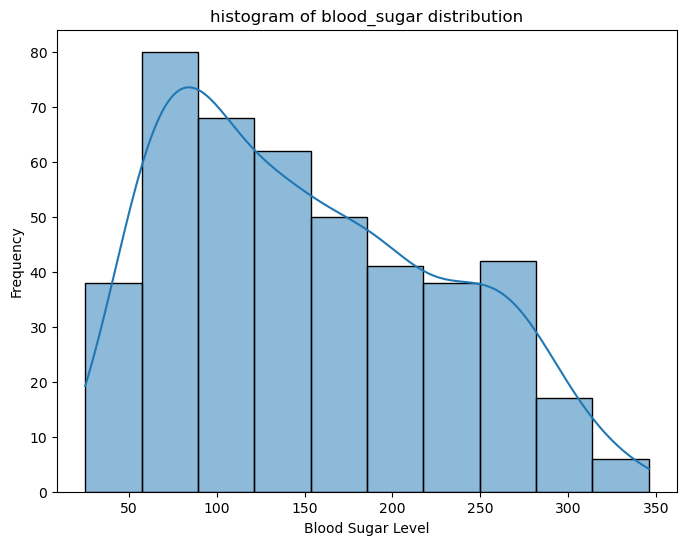

In [7]:
plot.figure(figsize=(8, 6))
sns.histplot(dataset_["blood_sugar"], kde=True)
plot.title("histogram of blood_sugar distribution")
plot.xlabel("Blood Sugar Level")
plot.ylabel("Frequency")
plot.show()

## Histogram of blood_sugar distribution is right skewed. 
### As you can see from the histogram above  peak of the graph lies to the left side of the center.

In [8]:
skewed = dataset_["blood_sugar"].skew()
if skewed > 0:
    print("right skewed")


right skewed


### Find the max  corrolated feature

In [17]:
dataset=dataset_.drop(columns=["sex"])
correlations = dataset.corr()['blood_sugar'].drop('blood_sugar')
most_correlated_feature = correlations.abs().idxmax()

In [18]:
most_correlated_feature

'bmi'

###   X, y graph of blood_sugar vs most correlated feature

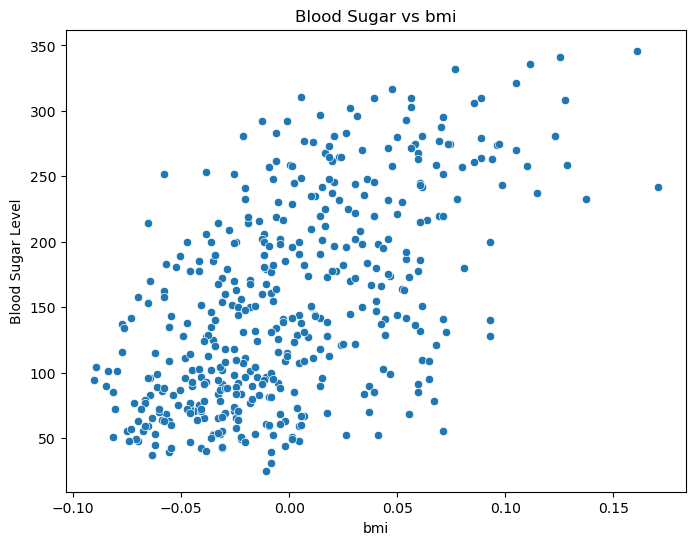

In [19]:
plot.figure(figsize=(8, 6))
sns.scatterplot(x=dataset_["bmi"], y=dataset_["blood_sugar"])
plot.title(f"Blood Sugar vs bmi")
plot.xlabel("bmi")
plot.ylabel("Blood Sugar Level")
plot.show()

### Find the min  corrolated feature

In [20]:
least_correlated_feature = correlations.abs().idxmin()

In [21]:
least_correlated_feature

's2'

###   X, y graph of blood_sugar vs least correlated feature

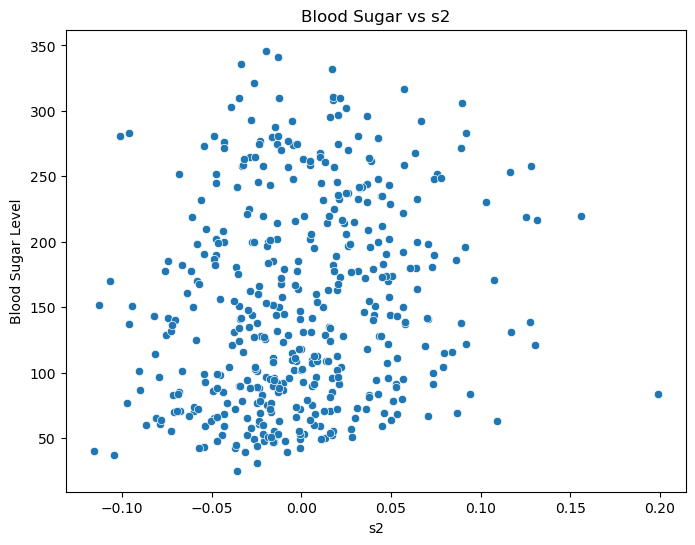

In [26]:
plot.figure(figsize=(8, 6))
sns.scatterplot(x=dataset_["s2"], y=dataset_["blood_sugar"])
plot.title(f"Blood Sugar vs s2")
plot.xlabel("s2")
plot.ylabel("Blood Sugar Level")
plot.show()

## relationship between age and blood_sugar

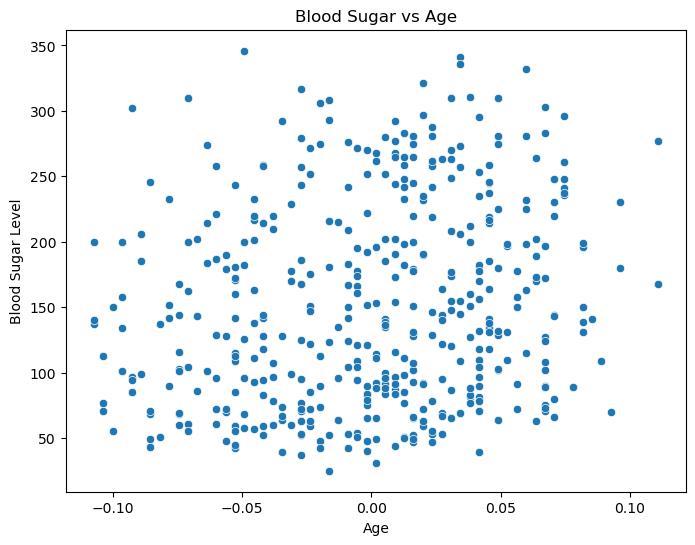

In [23]:
plot.figure(figsize=(8, 6))
sns.scatterplot(x=dataset_["age"], y=dataset_["blood_sugar"])
plot.title("Blood Sugar vs Age")
plot.xlabel("Age")
plot.ylabel("Blood Sugar Level")
plot.show()

### What happens as people age? Blood sugar increases or decreases?

In [24]:
age_correlation = dataset_["age"].corr(dataset_["blood_sugar"])
if age_correlation > 0:
    print("As people age, blood sugar increases.")
elif age_correlation < 0:
    print("As people age, blood sugar decreases.")

As people age, blood sugar increases.


### We can say that As people age, blood sugar increases.

# Relationship between sex and blood_sugar

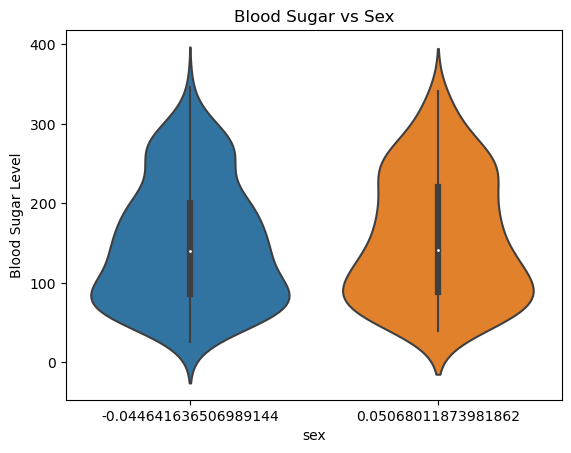

In [25]:
sns.violinplot(x=dataset_["sex"], y=dataset_["blood_sugar"])
plot.title("Blood Sugar vs Sex")
plot.ylabel("Blood Sugar Level")
plot.show()

## We can not say anything about expecting high blood sugar value between genders because of  the data is normalized and we can not understand which value corresponds to female or male.

## we can only say that  gender with a normalized value equals  approximately 0.05  is more  likely to have high blood sugar